In [9]:
import os

from nltk.corpus import stopwords
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, STOPWORDS


In [10]:
def load_movies(path="../data/raw/"):
    corpus = []
    classes = []
    label = 0
    for cl in os.listdir(path):  # parcours des fichiers d'un répertoire
        for f in os.listdir(path + cl):
            txt = open(path + cl + "/" + f).read()
            corpus.append(txt)
            classes.append(label)
        label += 1  # changer de répertoire <=> changement de classe
    return corpus, classes

alltxts, alllabels = load_movies()

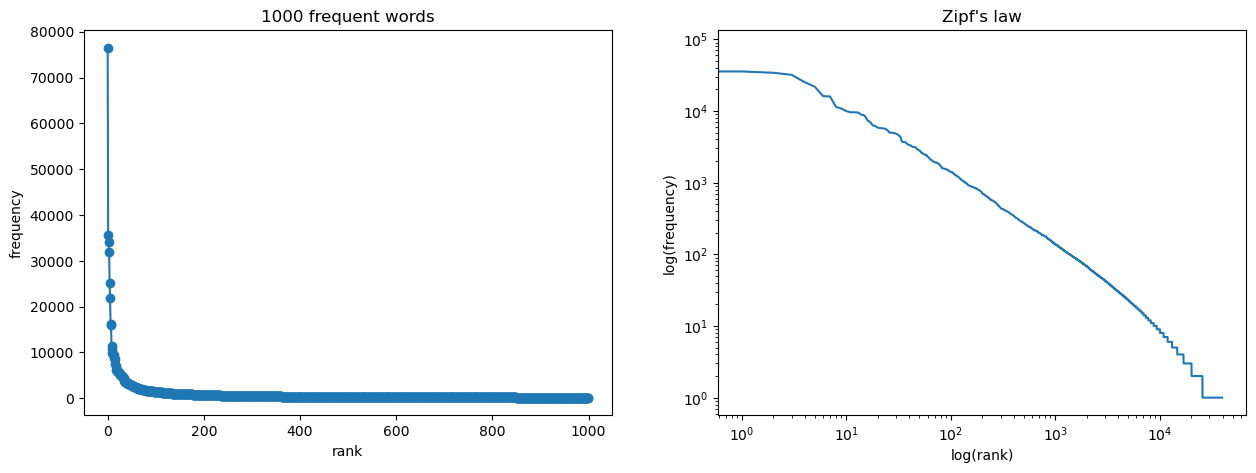

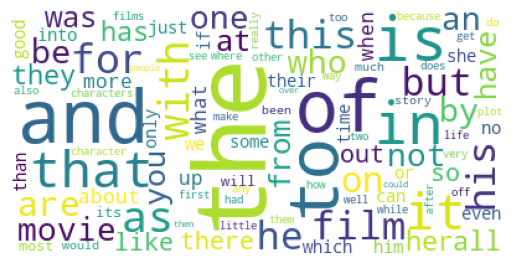

20 most frequent words
the     76529
and     35576
of      34123
to      31937
is      25195
in      21822
it      16107
that    15924
as      11378
with    10792
for      9961
his      9587
this     9578
film     9517
he       8864
but      8634
on       7385
are      6949
by       6261
be       6174
dtype: int64


In [11]:


## BoW (without stopwords)
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(np.array(X.sum(axis=0))[0], index = sorted(vectorizer.vocabulary_))

## Zipf's law
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(range(1000), frequent_words.sort_values(ascending=False)[:1000], "o-")
plt.ylabel("frequency")
plt.xlabel("rank")
plt.title("1000 frequent words")
plt.subplot(122)
plt.plot(frequent_words.sort_values(ascending=False))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title("Zipf's law")
plt.show()

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequent_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])

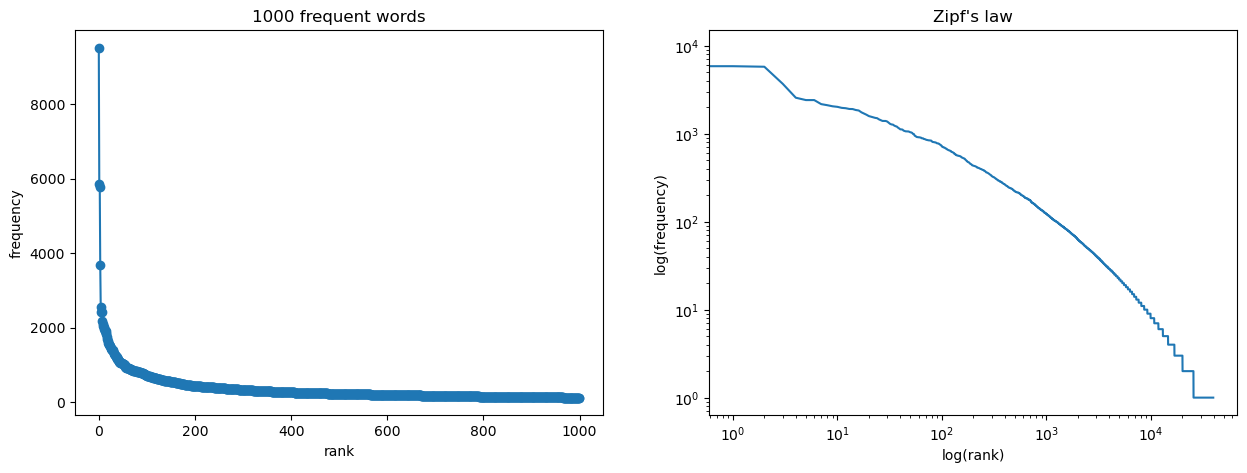

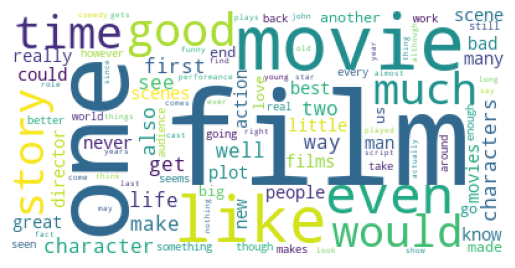

20 most frequent words
film          9517
one           5852
movie         5771
like          3690
even          2565
good          2411
time          2411
story         2169
would         2109
much          2049
character     2020
also          1967
get           1949
two           1911
well          1906
characters    1859
first         1836
see           1749
way           1693
make          1642
dtype: int64


In [12]:
## BoW (with stopwords)
vectorizer = CountVectorizer(stop_words=stopwords.words("english"))
X = vectorizer.fit_transform(alltxts)
frequent_words = pd.Series(np.array(X.sum(axis=0))[0], index = sorted(vectorizer.vocabulary_))

## Zipf's law
plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(range(1000), frequent_words.sort_values(ascending=False)[:1000], "o-")
plt.ylabel("frequency")
plt.xlabel("rank")
plt.title("1000 frequent words")
plt.subplot(122)
plt.plot(frequent_words.sort_values(ascending=False))
plt.yscale('log')
plt.xscale('log')
plt.xlabel("log(rank)")
plt.ylabel("log(frequency)")
plt.title("Zipf's law")
plt.show()

## 100 most frequent words
wordcloud = WordCloud(background_color="white", max_words=100)
wordcloud.generate_from_frequencies(frequent_words)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

## 
print("20 most frequent words")
print(frequent_words.sort_values(ascending=False)[:20])